In [1]:
import os

In [2]:
os.chdir(r"C:\Users\bishw\Downloads\Compressed\cell_images")

In [3]:
os.listdir()

['test', 'train']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from matplotlib.image import imread

In [6]:
test_dir = os.getcwd()+r'\test'
train_dir = os.getcwd()+r'\train'

In [7]:
os.listdir(train_dir)

['parasitized', 'uninfected']

In [8]:
os.listdir(test_dir)

['parasitized', 'uninfected']

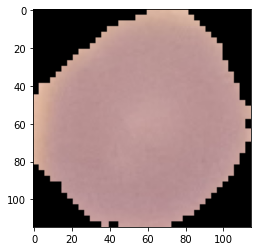

In [9]:
plt.imshow(imread(r"C:\Users\bishw\Downloads\Compressed\cell_images\train\uninfected\C1_thinF_IMG_20150604_104722_cell_9.png"))

In [10]:
para_cell = imread(r"C:\Users\bishw\Downloads\Compressed\cell_images\train\parasitized\C33P1thinF_IMG_20150619_114756a_cell_181.png")
para_cell

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

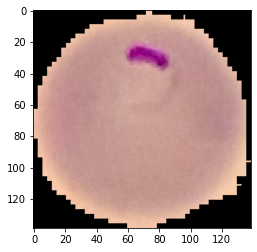

In [11]:
plt.imshow(imread(r"C:\Users\bishw\Downloads\Compressed\cell_images\train\parasitized\C33P1thinF_IMG_20150619_114756a_cell_181.png"))

In [12]:
len(os.listdir(train_dir+r'\parasitized'))

12480

In [13]:
dim1 = []
dim2 = []
for img_file in os.listdir(test_dir+r'\uninfected'):
    img = imread(test_dir+r'\uninfected'+'\\'+img_file)
    d1, d2, channel = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [14]:
max(dim1)

214

In [15]:
max(dim2)

217

### see histogram of img dims

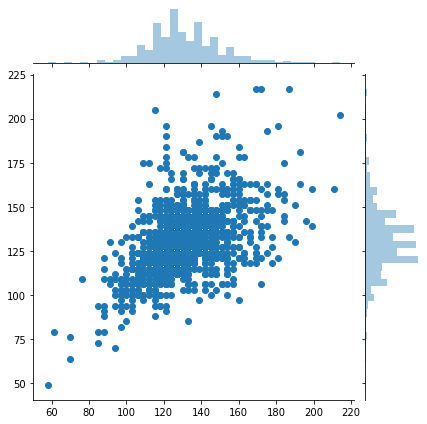

In [16]:
sns.jointplot(dim1, dim2)

In [17]:
std_img_shape = (int(np.round(np.mean(dim1),decimals = -1)), int(np.round(np.mean(dim2),decimals = -1)),3)
std_img_shape

(130, 130, 3)

In [52]:
std_img_shape[:2]

(130, 130)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

1. width_shift_range = 0.1 means randomly change width by 0 to 10%
2. rescale = 1/255 for rescaling the img
3. shear_range randoly cut image


In [19]:
img_gen = ImageDataGenerator(rotation_range = 20, width_shift_range = 0.1, height_shift_range = 0.1, shear_range = 0.1, zoom_range = 0.1, horizontal_flip = True, fill_mode = 'nearest')

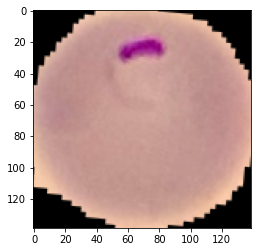

In [20]:
plt.imshow(img_gen.random_transform(para_cell))

In [21]:
img_gen.flow_from_directory(train_dir)

Found 24958 images belonging to 2 classes.


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

In [23]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=std_img_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=std_img_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=std_img_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [26]:
batch_size = 16

In [27]:
train_image_gen = img_gen.flow_from_directory(train_dir,
                                               target_size=std_img_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [28]:
test_image_gen = img_gen.flow_from_directory(test_dir,
                                               target_size=std_img_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle = False)

Found 2600 images belonging to 2 classes.


In [29]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [30]:
results = model.fit(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 459s 294ms/step - loss: 0.9257 - accuracy: 0.5409 - val_loss: 0.6912 - val_accuracy: 0.5346
Epoch 2/20
1560/1560 [==============================] - 381s 244ms/step - loss: 0.6825 - accuracy: 0.5670 - val_loss: 0.6759 - val_accuracy: 0.5888
Epoch 3/20
1560/1560 [==============================] - 325s 208ms/step - loss: 0.6773 - accuracy: 0.5846 - val_loss: 0.6693 - val_accuracy: 0.5946
Epoch 4/20
1560/1560 [==============================] - 323s 207ms/step - loss: 0.6717 - accuracy: 0.5976 - val_loss: 0.6719 - val_accuracy: 0.5804
Epoch 5/20
1560/1560 [==============================] - 324s 208ms/step - loss: 0.6013 - accuracy: 0.6638 - val_loss: 0.2622 - val_accuracy: 0.9104
Epoch 6/20
1560/1560 [==============================] - 324s 208ms/step - loss: 0.2228 - accuracy: 0.9323 - val_loss: 0.1919 - val_accuracy: 0.9431
Epoch 7/20
1560/1560 [==============================] - 321s 205ms/step - loss: 0.1976 - accuracy: 0.9397 - val_

In [31]:
from tensorflow.keras.models import load_model
model.save('malaria_detector.h5')

In [33]:
loss = pd.DataFrame(model.history.history)
loss

,loss,accuracy,val_loss,val_accuracy
0,0.925661,0.540909,0.691174,0.534615
1,0.682544,0.566952,0.675943,0.588846
2,0.677289,0.584582,0.669349,0.594615
3,0.671721,0.597564,0.671866,0.580385
4,0.601350,0.663795,0.262156,0.910385
5,0.222830,0.932326,0.191853,0.943077
6,0.197576,0.939739,0.179459,0.945769
7,0.185582,0.944747,0.174535,0.945385
8,0.183865,0.945068,0.199928,0.934615
9,0.178108,0.945228,0.161007,0.945385


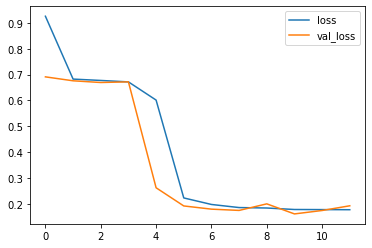

In [34]:
loss[['loss','val_loss']].plot()

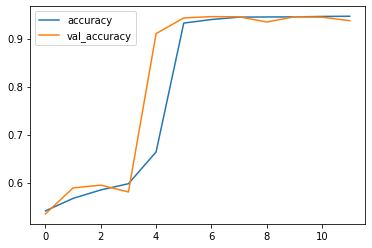

In [35]:
loss[['accuracy','val_accuracy']].plot()

In [36]:
model.evaluate(test_image_gen)

163/163 [==============================] - 17s 106ms/step - loss: 0.1849 - accuracy: 0.9381


[0.18491123616695404, 0.938076913356781]

In [43]:
pred = model.predict(test_image_gen) > 0.5
pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
print(classification_report(test_image_gen.classes,pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1300
           1       0.92      0.97      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [50]:
from tensorflow.keras.preprocessing import image

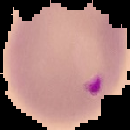

In [54]:
my_img = image.load_img(r"C:\Users\bishw\Downloads\Compressed\cell_images\test\parasitized\C33P1thinF_IMG_20150619_120804a_cell_224.png", target_size = std_img_shape)
my_img

In [57]:
img_arr = image.img_to_array(my_img)

### np.expand_dims creates a new dim at axis 0 ie (1,130,130,3) as we have to mention batch size of 1

In [61]:
img_arr = np.expand_dims(img_arr, axis = 0)
img_arr

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [63]:
model.predict(img_arr) > 0.5

array([[False]])